Episode 0


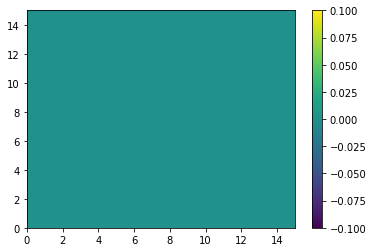

Episode 50


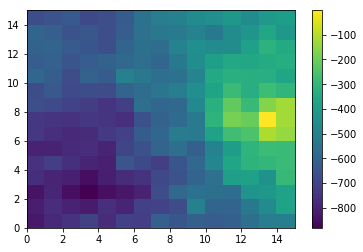

Episode 100


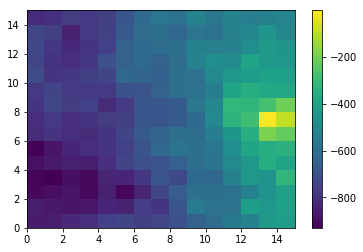

Episode 150


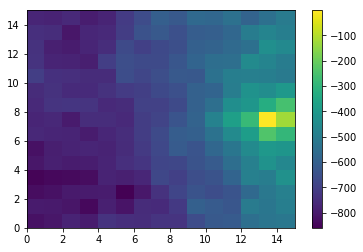

Episode 200


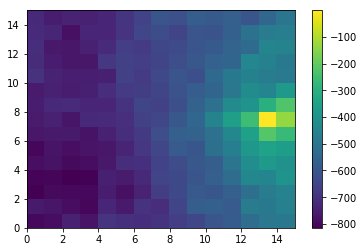

Episode 250


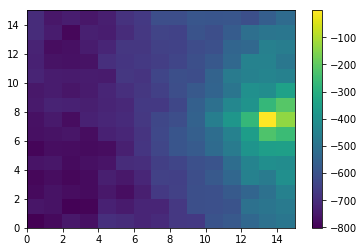

Episode 300


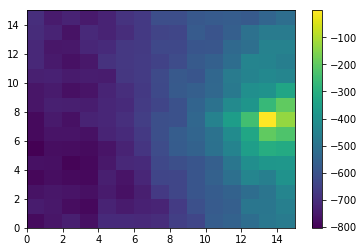

Episode 350


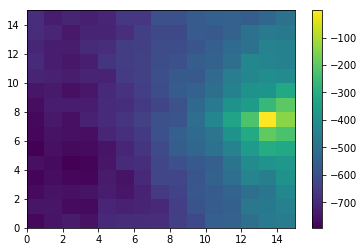

Episode 400


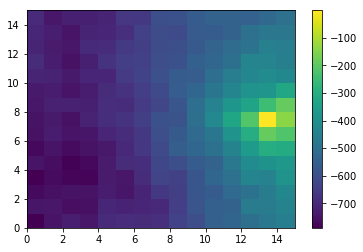

Episode 450


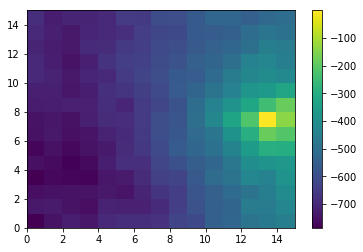

Episode 500


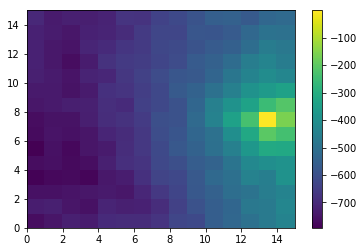

Episode 550


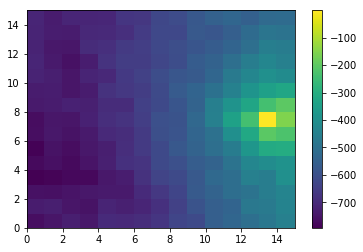

Episode 600


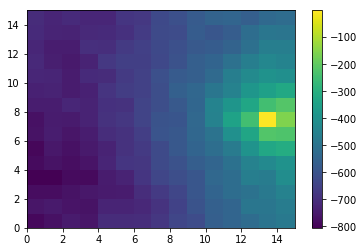

Episode 650


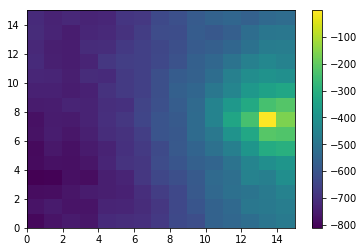

Episode 700


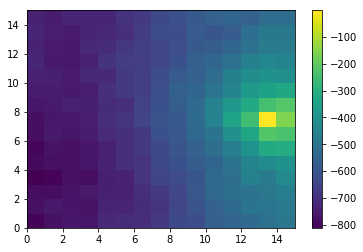

Episode 750


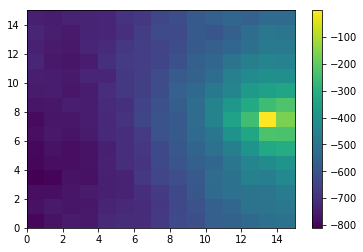

Episode 800


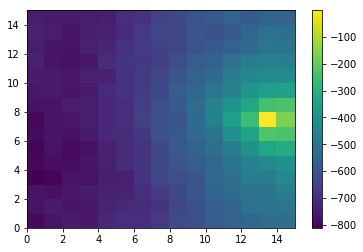

Episode 850


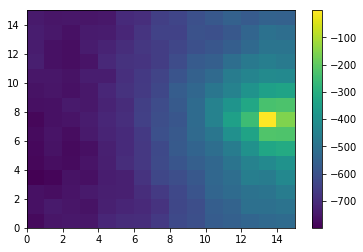

Episode 900


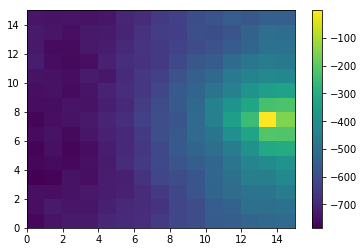

Episode 950


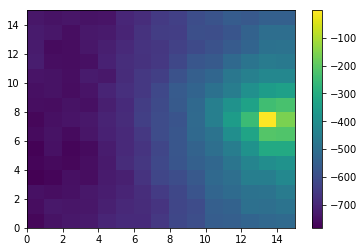

Episode 1000


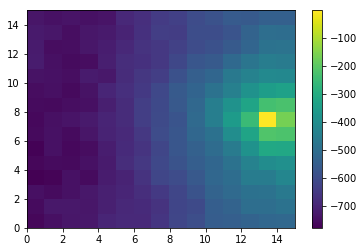

Episode 1050


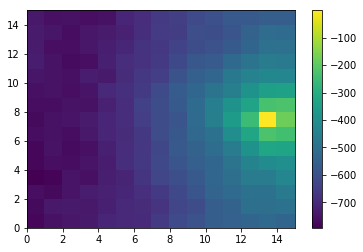

Episode 1100


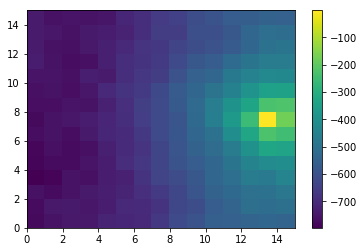

Episode 1150


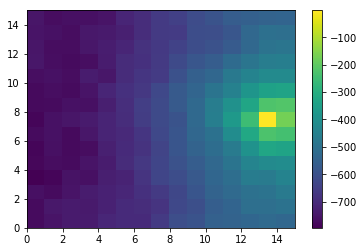

Episode 1200


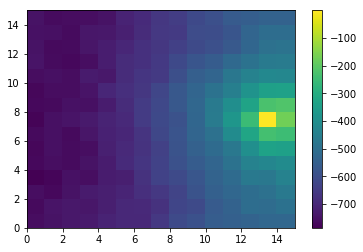

Episode 1250


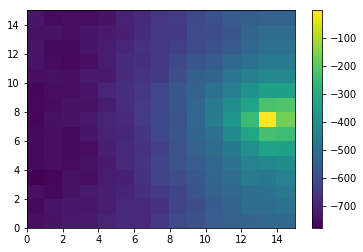

Episode 1300


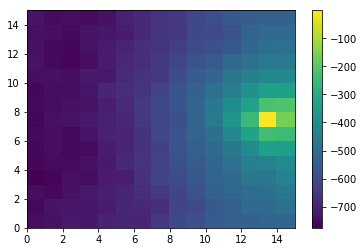

Episode 1350


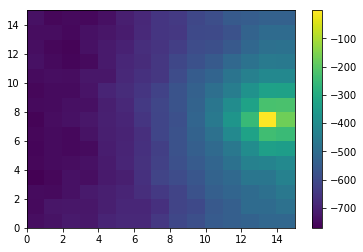

Episode 1400


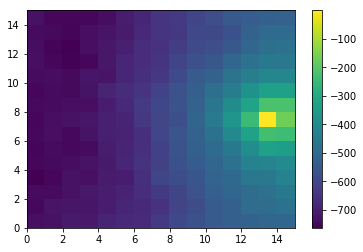

Episode 1450


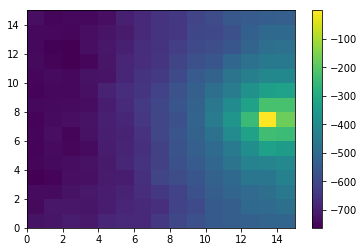

Episode 1500


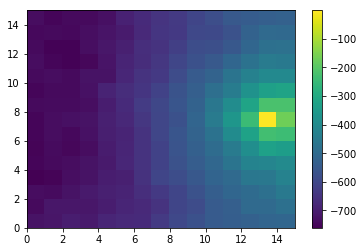

Episode 1550


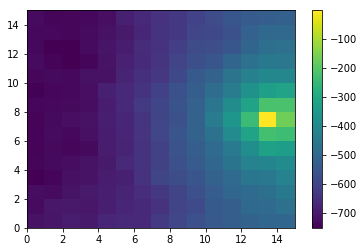

Episode 1600


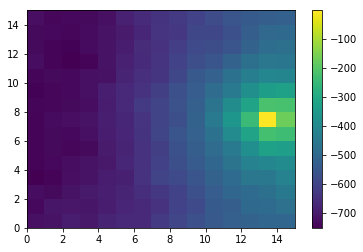

Episode 1650


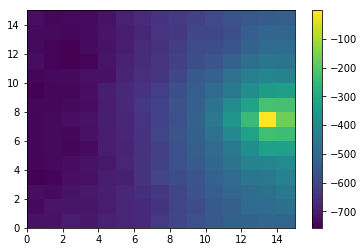

Episode 1700


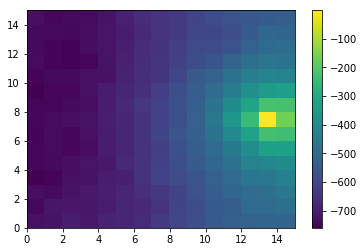

Episode 1750


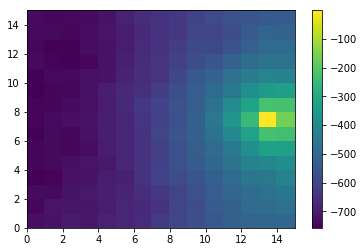

Episode 1800


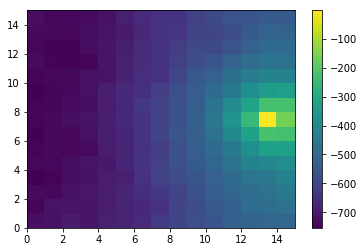

Episode 1850


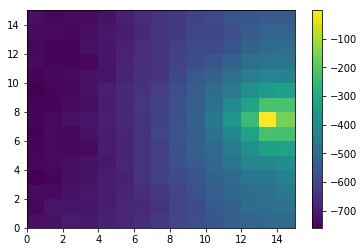

Episode 1900


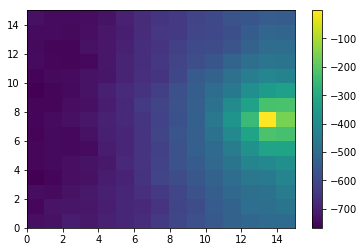

Episode 1950


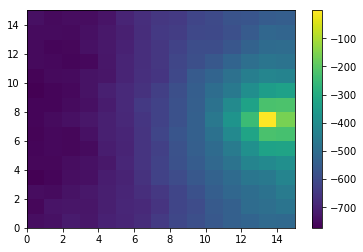

Reached max number of episodes: 2000
Episode 2000


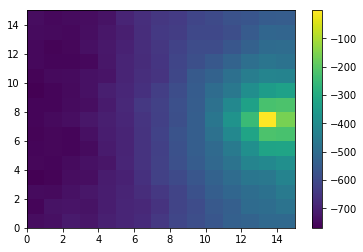

In [2]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import FirstVisitMonteCarlo
from myelin.core import RLInteraction, MDPEnvironment
from myelin.core.termination import MaxEpisodes
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS, COLS = 15, 15
mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)
value_function = np.zeros((ROWS, COLS))
agent = FirstVisitMonteCarlo(policy, value_function)


def display():
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(value_function)
    plt.colorbar()
    plt.show()


class LearningMonitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 50 == 0:
            print('Episode {}'.format(episode))
            display()

    def on_interaction_end(self, episode):
        print('Episode {}'.format(episode))
        display()


RLInteraction(
    env=env,
    agent=agent,
    callbacks=[LearningMonitor()],
    termination_conditions=[MaxEpisodes(n_episodes=2000)]
).start()
